# Binning spikes - excluding or including pauses in movie playback

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("/home/tamara/Documents/PhD/DeepHumanVision_deploy/")
from database.db_setup import *
import preprocessing.data_preprocessing.binning as binning
import annotation.stimulus_driven_annotation.movies.pause_handling as pause_handling
import preprocessing.data_preprocessing.create_vectors_from_time_points as create_vectors_from_time_points

Please enter DataJoint username:  tamara
Please enter DataJoint password:  ·········


Connecting tamara@localhost:3306


Set parameters:

In [11]:
patient_id = 60
session_nr = 1
unit_nr = 0
bin_size = 1000

# Binning of spikes

### (1) Extract spike times from database

In [4]:
spike_times = get_spiking_activity(patient_id, session_nr, unit_nr)

### <font color='red'>(2) Decide whether you want to exclude pauses from the data</font>

In [5]:
exclude_pauses = False

### (3) Bin spikes

In [8]:
binned_spikes = binning.bin_spikes(patient_id, session_nr, spike_times, bin_size, exclude_pauses)

### (4) Plot binned spikes

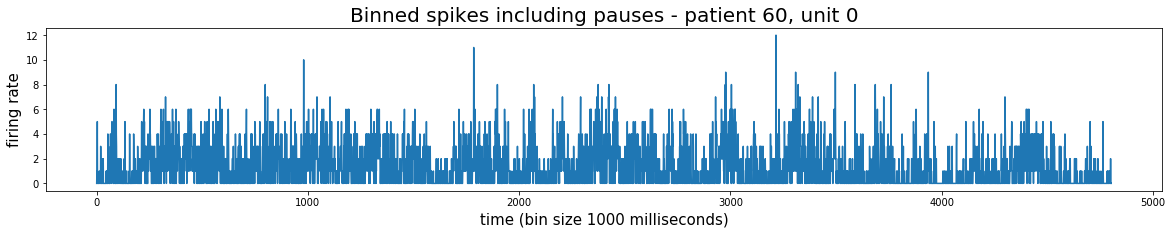

In [12]:
fig = plt.figure(figsize=(20,3))
plt.plot(binned_spikes)
if exclude_pauses:
    plt.title("Binned spikes excluding pauses - patient {}, unit {}".format(patient_id, unit_nr), fontsize=20)
else:
    plt.title("Binned spikes including pauses - patient {}, unit {}".format(patient_id, unit_nr), fontsize=20)
plt.xlabel("time (bin size {} milliseconds)".format(bin_size), fontsize=15)
plt.ylabel("firing rate", fontsize=15)
plt.show()